In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/items-orders/Orders data.xlsx
/kaggle/input/items-orders/Associated_Item_data.csv


In [2]:
items = pd.read_csv(r'/kaggle/input/items-orders/Associated_Item_data.csv')
orders = pd.read_excel(r'/kaggle/input/items-orders/Orders data.xlsx')

In [3]:
merged = pd.DataFrame(pd.merge(items,orders,on = 'order_id', how = 'left'))
merged.head()

,order_id,order_number_x,order_item_id,item_name,quantity,invoiced_quantity,mrp,price_per_unit,amount_x,discount_amount,...,customer_name,poc_name,poc_id,amount_y,discount,net_order_amount,profit_y,order_status,warehouse_name,warehouse_id
0,104592,SO/24-25/85358,202967,Anannya Rice,2,2,1732.000,1534.0,3464.00,396.00,...,AGRAWAL TRADERS,Support Team,5381,3464.00,396.00,3068.0,-208.00,CLOSED,Telibagh,2
1,74112,SO/24-25/55656,148560,Ambey Patent Maida,1,1,1899.000,1760.0,1899.00,139.00,...,Ramesh tiffin Sarvice,Anmol Mishra,4680,4932.50,367.50,4565.0,-34.75,CLOSED,Noida,3
2,105873,SO/24-25/86555,205222,Arhar Dal,10,0,173.567,127.0,1735.67,465.67,...,Prashsti General Store,Support Team,5381,3016.17,516.17,2500.0,-395.50,CLOSED,Telibagh,2
3,112302,SO/24-25/92717,216104,Kezar Maida,5,5,1760.000,1652.0,8800.00,540.00,...,Bheem General Store ( Ahmamau),Sumit Mishra,43,10590.00,660.00,9930.0,-200.00,CLOSED,Gomti Nagar,1
4,74308,SO/24-25/55887,148902,Normal Sugar,1,1,2190.000,2110.0,2190.00,80.00,...,AKMK GENERAL STORE,Raza Rizvi,5602,2190.00,80.00,2110.0,40.00,CLOSED,Telibagh,2


In [4]:
merged.columns

Index(['order_id', 'order_number_x', 'order_item_id', 'item_name', 'quantity',
       'invoiced_quantity', 'mrp', 'price_per_unit', 'amount_x',
       'discount_amount', 'profit_x', 'order_date', 'order_number_y',
       'customer_id', 'customer_name', 'poc_name', 'poc_id', 'amount_y',
       'discount', 'net_order_amount', 'profit_y', 'order_status',
       'warehouse_name', 'warehouse_id'],
      dtype='object')

In [5]:
merged.drop(['order_id','order_number_x','order_number_y','invoiced_quantity','mrp','amount_x','amount_y','discount','net_order_amount','profit_y','profit_x'] , axis=1, errors='ignore', inplace=True)

In [6]:
merged.drop(['customer_name','order_status'], axis = 1, inplace = True, errors = 'ignore')

In [7]:
merged.head()

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,poc_name,poc_id,warehouse_name,warehouse_id
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Support Team,5381,Telibagh,2
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Anmol Mishra,4680,Noida,3
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Support Team,5381,Telibagh,2
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Sumit Mishra,43,Gomti Nagar,1
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Raza Rizvi,5602,Telibagh,2


In [8]:
merged.drop(['poc_id','poc_name','warehouse_id'], axis = 1, inplace = True, errors = 'ignore')

In [9]:
merged.head()

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh


In [10]:
#Lag Features ---> How many same SKUs a customer purchased in the previous order
merged['lag_1_day'] = merged.groupby(['customer_id','item_name'])['quantity'].shift(1).fillna(0)

#7 orders ago
merged['lag_7_days'] = merged.groupby(['customer_id', 'item_name'])['quantity'].shift(7).fillna(0)

#14 orders ago
merged['lag_14_days'] = merged.groupby(['customer_id', 'item_name'])['quantity'].shift(14).fillna(0)

#30 orders ago
merged['lag_30_days'] = merged.groupby(['customer_id', 'item_name'])['quantity'].shift(30).fillna(0)
merged.head()

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name,lag_1_day,lag_7_days,lag_14_days,lag_30_days
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh,0.0,0.0,0.0,0.0
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida,0.0,0.0,0.0,0.0
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh,0.0,0.0,0.0,0.0
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar,0.0,0.0,0.0,0.0
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh,0.0,0.0,0.0,0.0


In [11]:
#average quantity ordered across their 7 most recent orders
merged['rolling_mean_7d'] = merged.groupby(['customer_id', 'item_name'])['quantity'].transform(
    lambda x: x.rolling(7, min_periods=1).mean())

#total quantity ordered across their 30 most recent orders
merged['rolling_sum_30d'] = merged.groupby(['customer_id', 'item_name'])['quantity'].transform(
    lambda x: x.rolling(30, min_periods=1).sum())

#how consistent or variable their ordering quantities have been across their 14 most recent orders
merged['rolling_std_14d'] = merged.groupby(['customer_id', 'item_name'])['quantity'].transform(
    lambda x: x.rolling(14, min_periods=1).std())

In [12]:
merged['rolling_std_14d'].isnull().sum()

32461

In [13]:
#Using missing indicator for rolling_std_14d
merged['is_std_imputed'] = merged['rolling_std_14d'].isna().astype(int)

In [14]:
merged['day_of_week'] = merged['order_date'].dt.day_name()

In [15]:
merged.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name,lag_1_day,lag_7_days,lag_14_days,lag_30_days,rolling_mean_7d,rolling_sum_30d,rolling_std_14d,is_std_imputed,day_of_week
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh,0.0,0.0,0.0,0.0,2.0,2.0,NaN,1,Thursday
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1,Tuesday
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh,0.0,0.0,0.0,0.0,10.0,10.0,NaN,1,Sunday
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar,0.0,0.0,0.0,0.0,5.0,5.0,NaN,1,Tuesday
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1,Tuesday


In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
encoded_days = pd.DataFrame(ohe.fit_transform(merged[['day_of_week']]))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
encoded_days.drop('6', axis = 1, inplace = True, errors = 'ignore')

In [18]:
merged = pd.concat([merged.reset_index(drop=True), encoded_days.reset_index(drop=True)], axis=1)

In [19]:
merged.drop('day_of_week', axis = 1, errors = 'ignore', inplace = True)

In [20]:
merged.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name,lag_1_day,lag_7_days,...,rolling_sum_30d,rolling_std_14d,is_std_imputed,0,1,2,3,4,5,6
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh,0.0,0.0,...,2.0,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida,0.0,0.0,...,1.0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh,0.0,0.0,...,10.0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar,0.0,0.0,...,5.0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh,0.0,0.0,...,1.0,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
merged['rolling_std_14d'] = merged['rolling_std_14d'].fillna(1)
merged.head()

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name,lag_1_day,lag_7_days,...,rolling_sum_30d,rolling_std_14d,is_std_imputed,0,1,2,3,4,5,6
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh,0.0,0.0,...,2.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida,0.0,0.0,...,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh,0.0,0.0,...,10.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar,0.0,0.0,...,5.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh,0.0,0.0,...,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
merged['is_weekend'] = merged['order_date'].dt.dayofweek.isin([5, 6]).astype(int)
merged.head()

,order_item_id,item_name,quantity,price_per_unit,discount_amount,order_date,customer_id,warehouse_name,lag_1_day,lag_7_days,...,rolling_std_14d,is_std_imputed,0,1,2,3,4,5,6,is_weekend
0,202967,Anannya Rice,2,1534.0,396.00,2025-01-16,5980,Telibagh,0.0,0.0,...,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,148560,Ambey Patent Maida,1,1760.0,139.00,2024-10-22,5540,Noida,0.0,0.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,205222,Arhar Dal,10,127.0,465.67,2025-01-19,1119,Telibagh,0.0,0.0,...,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,216104,Kezar Maida,5,1652.0,540.00,2025-02-04,3776,Gomti Nagar,0.0,0.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,148902,Normal Sugar,1,2110.0,80.00,2024-10-22,5569,Telibagh,0.0,0.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [23]:
merged.drop(['item_name', 'warehouse_name'], axis=1, inplace=True, errors='ignore')  

In [24]:
import holidays

india_holidays = holidays.India()

merged['holiday'] = merged['order_date'].apply(lambda x: 1 if x in india_holidays else 0)

In [25]:
merged['discount_percentage'] = merged['discount_amount'] / merged['price_per_unit']
merged.drop(['price_per_unit','discount_amount'], inplace = True, errors = 'ignore', axis = 1)
merged.head()

,order_item_id,quantity,order_date,customer_id,lag_1_day,lag_7_days,lag_14_days,lag_30_days,rolling_mean_7d,rolling_sum_30d,...,0,1,2,3,4,5,6,is_weekend,holiday,discount_percentage
0,202967,2,2025-01-16,5980,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.258149
1,148560,1,2024-10-22,5540,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.078977
2,205222,10,2025-01-19,1119,0.0,0.0,0.0,0.0,10.0,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,3.666693
3,216104,5,2025-02-04,3776,0.0,0.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.326877
4,148902,1,2024-10-22,5569,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.037915


In [26]:
split_date = pd.to_datetime('2025-03-01')
train = merged[merged['order_date'] < split_date]
test = merged[merged['order_date'] >= split_date]

In [27]:
customer_items = merged[['customer_id', 'order_item_id']].drop_duplicates()

In [28]:
# For gradient boosting approach
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
X_train = train.drop(['quantity', 'order_date'], axis=1)
y_train = train['quantity']
X_test = test.drop(['quantity', 'order_date'], axis=1)
y_test = test['quantity']

In [30]:
model = LGBMRegressor(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1714
[LightGBM] [Info] Number of data points in the train set: 90566, number of used features: 20
[LightGBM] [Info] Start training from score 6.729910


LGBMRegressor(learning_rate=0.05)

In [31]:
preds = model.predict(X_test)
pred_quantity = pd.DataFrame(np.round(preds))
preds

array([2.88395038, 1.08903108, 1.08903108, ..., 3.81636703, 9.57857366,
       1.93892666])

In [32]:
#Forecasted graph
pred_quantity = pd.DataFrame(np.round(preds))
pred_quantity

,0
0,3.0
1,1.0
2,1.0
3,10.0
4,5.0
...,...
24522,3.0
24523,5.0
24524,4.0
24525,10.0


In [33]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print(f'Test MAE: {mae}')
print(f"MSE {mse}")

Test MAE: 1.4532884688677006
MSE 162.85865051992533


In [34]:
from matplotlib.dates import DateFormatter, MonthLocator

# Step 1: Aggregate quantities by date for actual data
# Assuming df contains your complete dataset with order_date and quantity
daily_quantities = merged.groupby('order_date')['quantity'].sum()

In [35]:
# Get unique dates in test set
test_dates = sorted(test['order_date'])

In [36]:
preds.shape

(24527,)

In [37]:
# Create prediction DataFrame with dates
predictions_df = pd.DataFrame({
    'order_date': test_dates,
    'predicted_quantity': np.round(preds)  # Assuming preds aligns with test_dates
})

In [38]:
predictions_df = predictions_df.groupby('order_date')['predicted_quantity'].agg('sum').reset_index(name = 'quantity')

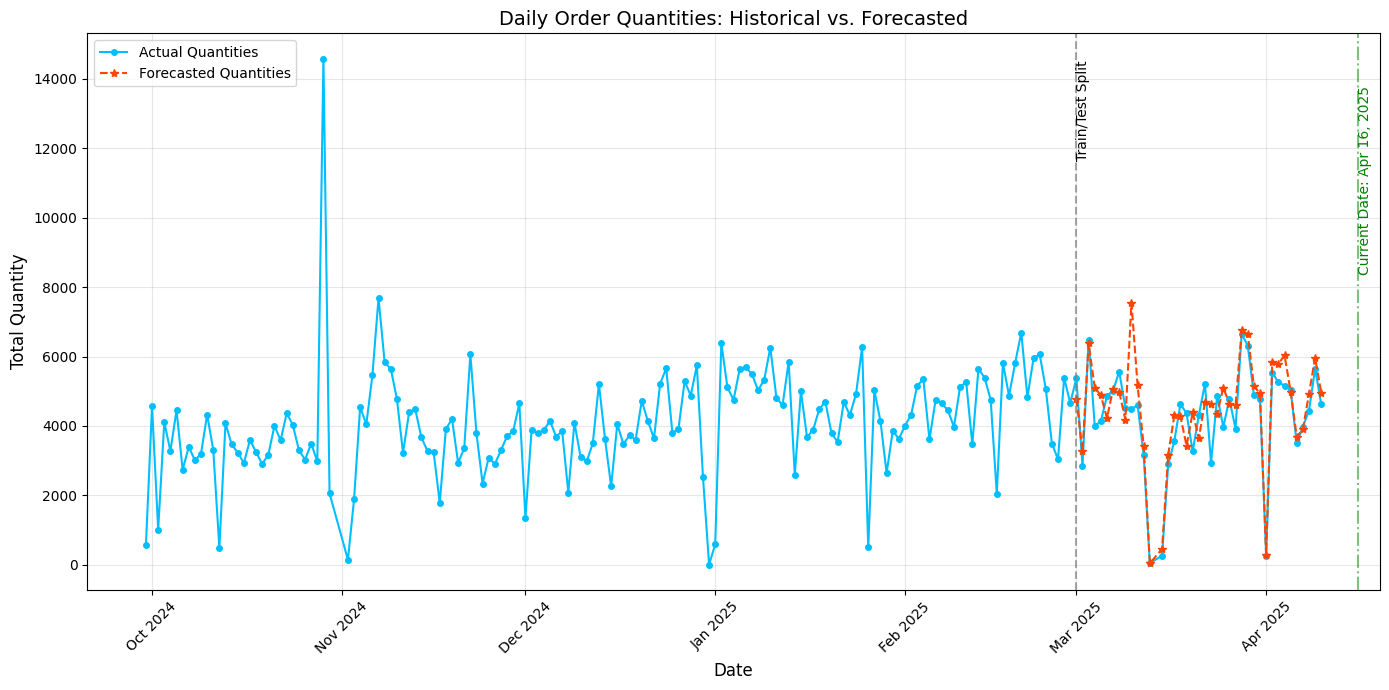

In [39]:
import matplotlib.pyplot as plt
# Step 3: Create the visualization
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(daily_quantities.index, daily_quantities.values, 
         marker='o', linestyle='-', color='#00BFFF', 
         markersize=4, label='Actual Quantities')

# Plot forecast data
plt.plot(predictions_df['order_date'], predictions_df['quantity'], 
         marker='*', linestyle='--', color='#FF4500', 
         markersize=6, label='Forecasted Quantities')

# Add vertical line at split date
split_date = pd.to_datetime('2025-03-01')
plt.axvline(x=split_date, color='gray', linestyle='--', alpha=0.7)
plt.text(split_date, plt.ylim()[1]*0.95, 'Train/Test Split', 
         rotation=90, verticalalignment='top')

# Format x-axis
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add labels and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.title('Daily Order Quantities: Historical vs. Forecasted', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Add current date annotation
current_date = pd.to_datetime('2025-04-16')
plt.axvline(x=current_date, color='green', linestyle='-.', alpha=0.5)
plt.text(current_date, plt.ylim()[1]*0.9, 'Current Date: Apr 16, 2025', 
         rotation=90, verticalalignment='top', color='green')

plt.tight_layout()
plt.show()